# Import

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
import tensorflow_probability as tfp

# Mathematical Operations

In [16]:
x, y = 2.0, 3.0

add = tf.add(x, y)
sub = tf.subtract(x, y)
mul = tf.multiply(x, y)
div = tf.divide(x, y)
pow = tf.pow(x, y)

print(add); print(sub); print(mul); print(div); print(pow);

tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(-1.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(0.6666667, shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)


We can also pass in numpy directly and get numpy out of the tensor.

In [17]:
np_add = tf.add(np.array([2,4]),np.array([2,4]))
print(np_add)
print(np_add.numpy())

tf.Tensor([4 8], shape=(2,), dtype=int64)
[4 8]


# Hardware Acceleration

In [18]:
# In colab, change runtime... otherwise it would be used automatically if GPU version of TF is installed
if tf.test.gpu_device_name() == '/device:GPU:0':
  print("GPU is being used.")
else:
  print("CPU is being used.")

GPU is being used.


# Vecotorized Computation

In [19]:
matrix = tf.random.uniform(shape=[1000, 10, 10])
vectors = tf.random.uniform(shape=[1000, 10, 1])

#solve using loop
def loop_solve():
  return np.array(
    [tf.linalg.solve(matrix[i, ...], vectors[i, ...]) for i in range(1000)])
  
#solve using vectorization
def vectorized_solve():
  return tf.linalg.solve(matrix, vectors)

%timeit loop_solve()
%timeit vectorized_solve()

1 loop, best of 3: 3.82 s per loop
1000 loops, best of 3: 294 µs per loop


# Automatic Differentiation


**Differentiation**
* Symbolic differentiation
* [Numerical differentiation](https://en.wikipedia.org/wiki/Finite_difference)
* [Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation)

**Symbolic** <br>

Take the derivative of $f(x) = x^3$<br>
Symbolic derivative $f'(x) = 3x^{2}$<br><br>

$f(5) = 5^3 = 125$<br>
$f'(5) = 3 \cdot 5^2 = 75$<br>


**Numerical**<br>
For example Newtons Method.<br><br>

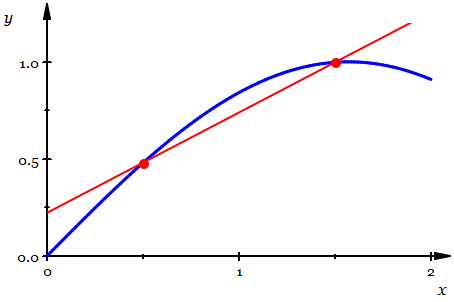

In [20]:
# f(x)
x = tf.constant(5.0)
with tf.GradientTape() as t:
  t.watch(x)
  f = tf.pow(x, 3.0)

# f'(x)
dfdx = t.gradient(f, x)
print('f(5) = {} and f\'(5) = {}'.format(f.numpy(), dfdx.numpy()))

f(5) = 125.0 and f'(5) = 74.99999237060547


Let's try the more complex sigmoid function.<br><br>
$f(x) = \frac{1}{1 + e^{-x}}$<br><br>
$f'(x) = \frac{e^x}{(e^x + 1)^2}$

In [21]:
# f(x)
x = tf.constant(5.0)
with tf.GradientTape() as t:
    t.watch(x)
    f = tf.divide(1.0, tf.add(1, tf.exp(tf.negative(x))))

# f'(x)
dfdx = t.gradient(f, x)
print('f(5) = {} and f\'(5) = {}'.format(f.numpy(), dfdx.numpy()))

f(5) = 0.9933071732521057 and f'(5) = 0.006648056674748659


2nd Order Derivative

In [22]:
# f(x)
x = tf.constant(5.0)
with tf.GradientTape() as t1:
  t1.watch(x)
  with tf.GradientTape() as t2:
    t2.watch(x)
    f = tf.divide(1.0, tf.add(1, tf.exp(tf.negative(x))))

  # f'(x)
  dfdx = t2.gradient(f, x)
d2fdx2 = t1.gradient(dfdx, x)
print('f(5) = {} and f\'(5) = {} and f\'\'(5) = {}'.format(f.numpy(), dfdx.numpy(), d2fdx2.numpy()))

f(5) = 0.9933071732521057 and f'(5) = 0.006648056674748659 and f''(5) = -0.0065590678714215755


# Distributions

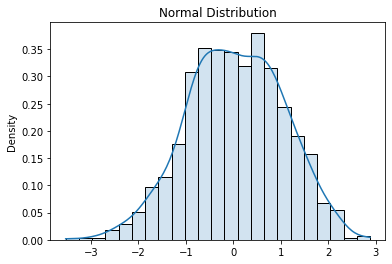

In [23]:
# A standard normal
normal = tfp.distributions.Normal(loc=0.0, scale=1.0)

# Plot 1000 samples from a standard normal
samples = normal.sample(1000)
sns.histplot(samples, kde=True, stat="density", alpha=0.2)
plt.title('Normal Distribution')
plt.show()

In [24]:
# methods / calcuations
print('prob:', normal.prob(0.0).numpy())
print('log_prob:', normal.log_prob(0.0).numpy())
print('entropy:', normal.entropy(name='entropy').numpy())
print('cross entropy:', normal.cross_entropy(tfp.distributions.Normal(loc=0.0, scale=2.0), name='cross_entropy').numpy())
print('kl:', normal.kl_divergence(tfp.distributions.Normal(loc=0.0, scale=2.0), name='kl_divergence').numpy())
print('mean:', normal.mean(name='mean').numpy())
print('mode:', normal.mode(name='mode').numpy())
print('stddev:', normal.stddev(name='stddev').numpy())

# multiple points
print('\nprob:', normal.prob([-1.0, 0.0, 1.0]).numpy())
print('log prob:', normal.log_prob([-1.0, 0.0, 1.0]).numpy())


prob: 0.3989423
log_prob: -0.9189385
entropy: 1.4189385
cross entropy: 1.7370857
kl: 0.31814718
mean: 0.0
mode: 0.0
stddev: 1.0

prob: [0.24197072 0.3989423  0.24197072]
log prob: [-1.4189385 -0.9189385 -1.4189385]


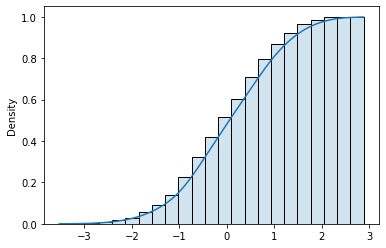

[0.15865526 0.5        0.97724986]


In [25]:
sns.histplot(samples, cumulative=True, kde=True, stat = 'density', alpha=0.2)
plt.show()

# sample the cdf
print(normal.cdf([-1.0, 0.0, 2.0]).numpy())

# Bijectors

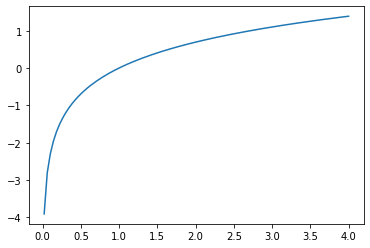

In [26]:
bijector = tfp.bijectors.Log()
xs = np.linspace(-4.0, 4.0, 200)
plt.plot(xs, bijector.forward(xs))
plt.show()

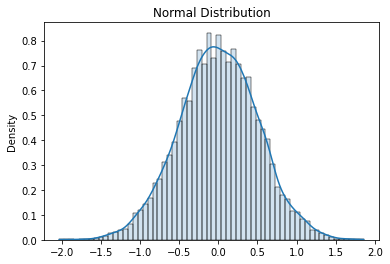


Normal prob: 0.7978846
Normal log_prob: -0.22579134


In [27]:
# A standard normal
normal = tfp.distributions.Normal(loc=0.0, scale=0.5)
samples = normal.sample(10000)
sns.histplot(samples, kde=True, stat="density", alpha=0.2)
plt.title('Normal Distribution')
plt.show()
#############################################################
print('\nNormal prob:', normal.prob(0.0).numpy())
print('Normal log_prob:', normal.log_prob(0.0).numpy())

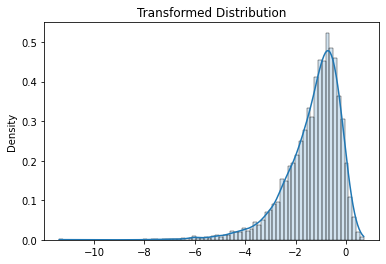


Transformed prob: 0.10798192
Transformed log_prob: -2.2257915


In [28]:
transformed = bijector(normal)
#############################################################
samples = transformed.sample(10000)
sns.histplot(samples, kde=True, stat="density", alpha=0.2)
plt.title('Transformed Distribution')
plt.show()
#############################################################
print('\nTransformed prob:', transformed.prob(0.0).numpy())
print('Transformed log_prob:', transformed.log_prob(0.0).numpy())